# Convolutions on an image

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2

In [137]:
image = np.array(cv2.imread('image.png', cv2.IMREAD_GRAYSCALE))

([], <a list of 0 Text yticklabel objects>)

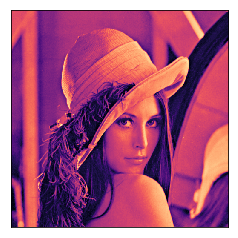

In [138]:
plt.figure(figsize=(4,4))
plt.imshow(image, cmap='magma')
plt.xticks([])
plt.yticks([])

In [139]:
new_image = np.array(image, dtype=np.float32)
new_image = np.expand_dims(new_image, axis=2)
dataset = np.array([new_image, new_image], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

In [140]:
filters = np.zeros(shape=(16,16,channels, 2), dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

In [141]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,1,1,1], padding='SAME')
#convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding='SAME')
with tf.Session() as sess:
  output = sess.run(convolution, feed_dict={X:dataset})

## The second (third) image below corresponds to a feature map obtained after a convolution with a vertical (horizontal) filter.

<Figure size 432x288 with 0 Axes>

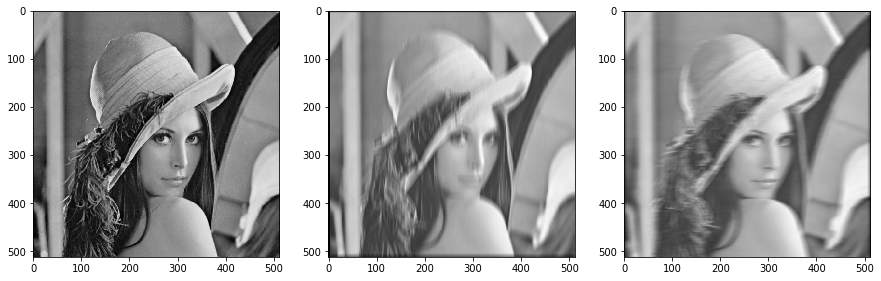

In [142]:
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,15))
ax1.imshow(image, cmap='gray')
ax2.imshow(output[0,:,:,0], cmap='gray')
ax3.imshow(output[0,:,:,1], cmap='gray')

## Pooling

In [143]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,5,5,1], strides=[1,2,2,1], padding='VALID')
with tf.Session() as sess:
    output_2 = sess.run(max_pool, feed_dict={X: dataset})

<Figure size 432x288 with 0 Axes>

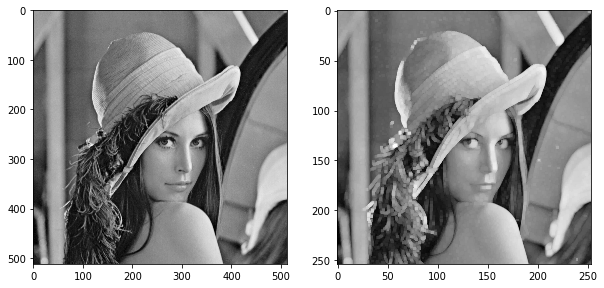

In [144]:
plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
ax1.imshow(image, cmap='gray')
ax2.imshow(output_2[1,:,:,0], cmap='gray')